# Seattle Crime Analysis

* The most frequent crime happens in seattle is **CAR PROWL**
* Top hours of CAR PROWL on average is **7:00am to 9:00am**
* Top date of CAR PROWL is **Middle July**

### Load library

In [1]:
import graphlab

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

This non-commercial license of GraphLab Create is assigned to kilading@udel.edu and will expire on March 03, 2017. For commercial licensing options, visit https://dato.com/buy/.


2016-05-28 22:29:09,000 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.9 started. Logging: /tmp/graphlab_server_1464488947.log


### Load the data set

In [3]:
import os
cwd = os.getcwd()

In [4]:
graphlab.canvas.set_target('ipynb')

In [5]:
data = graphlab.SFrame(cwd + '\seattle_incidents_summer_2014.csv')

Finished parsing file /Users/Ding/Google Drive/Coursera/DataAtScale/Course4/seattle_incidents_summer_2014.csv

Parsing completed. Parsed 100 lines in 0.2452 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,str,str,str,str,str,str,str,str,str,float,float,float,str,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/Ding/Google Drive/Coursera/DataAtScale/Course4/seattle_incidents_summer_2014.csv

Parsing completed. Parsed 32779 lines in 0.244498 secs.

In [6]:
data.column_names()

['RMS CDW ID',
 'General Offense Number',
 'Offense Code',
 'Offense Code Extension',
 'Offense Type',
 'Summary Offense Code',
 'Summarized Offense Description',
 'Date Reported',
 'Occurred Date or Date Range Start',
 'Occurred Date Range End',
 'Hundred Block Location',
 'District/Sector',
 'Zone/Beat',
 'Census Tract 2000',
 'Longitude',
 'Latitude',
 'Location',
 'Month',
 'Year']

In [7]:
data['Date Reported'] = data['Date Reported'].str_to_datetime('%m/%d/%Y %H:%M:%S %P')

In [8]:
data['Hour'] = data['Date Reported'].split_datetime(limit = ['hour'])['X.hour']

In [9]:
data['Date'] = data['Date Reported'].apply(lambda x: x.date())

In [10]:
min(data['Date'])

datetime.datetime(2014, 6, 1, 0, 0)

In [11]:
max(data['Date'])

datetime.datetime(2015, 6, 28, 0, 0)

### The most frequent crime

In [12]:
top_crime = data.groupby(key_columns = 'Summarized Offense Description', 
                         operations = {'count': graphlab.aggregate.COUNT()})

In [13]:
top_crime = top_crime.sort('count', ascending = False)[:10]

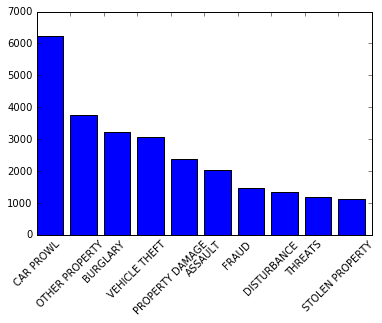

In [15]:
plt.bar(range(top_crime.num_rows()), top_crime['count'])

plt.xticks(range(top_crime.num_rows()), top_crime['Summarized Offense Description'])

plt.xticks(rotation = 45)

plt.show()

The most frequent crime happens in seattle is **CAR PROWL**

### Top hour of day when CAR PROWL happens

In [16]:
car_prowl = data[data['Summarized Offense Description'] == 'CAR PROWL']

In [17]:
crime_hour = car_prowl.groupby(key_columns = 'Hour', 
                         operations = {'count': graphlab.aggregate.COUNT()})

In [18]:
crime_hour = crime_hour.sort('Hour', ascending = True)

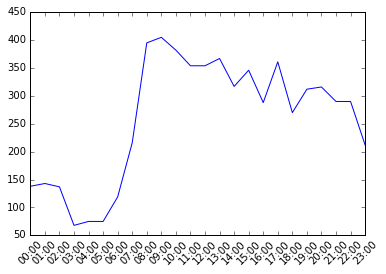

In [19]:
plt.plot(crime_hour['Hour'], crime_hour['count'])
hour_tick = [str(hour).zfill(2) + ':00' for hour in crime_hour['Hour']]
plt.xticks(crime_hour['Hour'], hour_tick)
plt.xticks(rotation = 45)
plt.xlim(0, 23)
plt.show()

Top hours of CAR PROWL on average is **7:00am to 9:00am**

### Top period when CAR PROWL happens

In [20]:
crime_date = car_prowl.groupby(key_columns = 'Date', 
                         operations = {'count': graphlab.aggregate.COUNT()})

In [21]:
crime_date = crime_date.sort('Date', ascending = True)

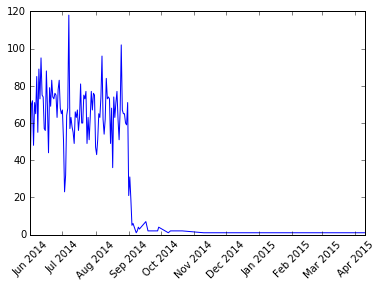

In [22]:
plt.plot(crime_date['Date'], crime_date['count'])
plt.xticks(rotation = 45)
plt.xlim()
plt.show()

Top date of CAR PROWL is **Middle July**